In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv(r'C:\Users\Saran\Documents\Portfolio Projects\Python Portfolio Projects\NBA Players\2022-2023_NBA_Regular_Season.csv', encoding = 'latin-1')
df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
5,6,Nickeil Alexander-Walker,SG,24,TOT,59,3,15.0,2.2,5.0,...,0.667,0.3,1.5,1.7,1.8,0.5,0.4,0.9,1.5,6.2
6,6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,...,0.692,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3
7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,5.4,...,0.619,0.3,1.5,1.8,1.4,0.3,0.3,0.4,1.3,5.9
8,7,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,7.7,...,0.905,0.8,2.4,3.3,2.3,0.9,0.2,1.0,1.6,10.4
9,8,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,...,0.733,3.3,6.5,9.8,1.7,0.8,1.2,1.4,2.3,14.3


#### **Data Cleaning**

Before we analyze any data, let's begin with some data cleaning.

In [24]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

We can drop the `Rk` column here as we will not use this column in our analysis.

In [25]:
df = df.drop(columns = 'Rk')

We are going to rename the `Tm` column to `Team` to make it more readable and understandable.

In [26]:
df = df.rename(columns= {'Tm':'Team'})

In [27]:
df.head()

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [28]:
df.shape

(679, 29)

This dataset has 679 rows and 29 columns which implies there are 679 players and 29 variables. 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  679 non-null    object 
 1   Pos     679 non-null    object 
 2   Age     679 non-null    int64  
 3   Team    679 non-null    object 
 4   G       679 non-null    int64  
 5   GS      679 non-null    int64  
 6   MP      679 non-null    float64
 7   FG      679 non-null    float64
 8   FGA     679 non-null    float64
 9   FG%     679 non-null    float64
 10  3P      679 non-null    float64
 11  3PA     679 non-null    float64
 12  3P%     679 non-null    float64
 13  2P      679 non-null    float64
 14  2PA     679 non-null    float64
 15  2P%     679 non-null    float64
 16  eFG%    679 non-null    float64
 17  FT      679 non-null    float64
 18  FTA     679 non-null    float64
 19  FT%     679 non-null    float64
 20  ORB     679 non-null    float64
 21  DRB     679 non-null    float64
 22  TR

In [30]:
df.isna().sum()

Player    0
Pos       0
Age       0
Team      0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

The dataset contains no missing values which is a good thing.

In [31]:
df.dtypes.value_counts()

float64    23
object      3
int64       3
Name: count, dtype: int64

The dataset contains of 23 float variables, 3 object variables are 3 integer variables. We are going to examine the object variables to see if anything needs to be changed.

In [32]:
df.describe(include= 'object')

,Player,Pos,Team
count,679,679,679
unique,539,8,31
top,Dorian Finney-Smith,SG,TOT
freq,3,168,70


When we use the `describe()` method we observe that there are supposedly 8 positions and 31 teams which does not make any sense as there are only 5 positions in the NBA and 30 teams.

It appears the extra `Team` is labeled as TOT where TOT means Two Other Teams. This implies that this specific player got traded midway through the season. Therefore, players listed as TOT is the average of their stats on both teams they played for that season. This explains why there are 31 teams under `Team` even though the NBA has 30 teams in total. 

During this EDA process we will exclude these data rows as we'll consider players individually on each team they played for. The reasoning for this is that players may have different roles on any given team which could lead to them performing differently. 

Let's take Mikal Bridges for example. Mikal was traded from the Phoenix Suns to the Brooklyn Nets mid-way through the season. Below we can examine Mikal Bridges stats on both Phoenix and Brooklyn and compare them. 

In [33]:
mikal = df.loc[df['Player'] == 'Mikal Bridges']
mikal[['Team','G','PTS','TRB','AST','FGA','FG','FG%','3P%','FTA','FT%']]

,Team,G,PTS,TRB,AST,FGA,FG,FG%,3P%,FTA,FT%
77,TOT,83,20.1,4.4,3.3,15.3,7.1,0.468,0.382,4.3,0.895
78,PHO,56,17.2,4.3,3.6,13.6,6.3,0.463,0.387,3.1,0.897
79,BRK,27,26.1,4.5,2.7,18.6,8.9,0.475,0.376,6.6,0.894


As we can see, Mikal's offensive output grew tremendously as he began to average 9 more points per game in his time in Brooklyn compared to his time in Phoenix. We also see he began to take roughly 5 more shots per game and as well as 3 more free throws per game ever since he joined the Brookly Nets. 

As per Mikal's example, players outputs on the court can truly depend on the environment they are in. Hence, going forward with this dataset we will remove the data entries whom have TOT under their `Team`. 

Even though there are 5 positions in the NBA, the dataset shows that there are 8 unique positions. Let's examine the unique positions.

In [34]:
df['Pos'].unique()

array(['C', 'SG', 'PF', 'PG', 'SF', 'PF-SF', 'SF-SG', 'SG-PG'],
      dtype=object)

The 3 added positions seem like they are flex positions (PF-SF, SF-SG, SG-PG). Let's examine which players are under these specific positions and see if we can figure something out from this.

In [35]:
df[df['Pos'] == 'PF-SF']

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
174,Kevin Durant,PF-SF,34,TOT,47,47,35.6,10.3,18.3,0.560,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1
346,Kevin Knox,PF-SF,23,TOT,63,5,15.1,2.4,5.3,0.458,...,0.767,0.5,2.3,2.8,0.5,0.4,0.2,0.8,1.5,6.6
631,T.J. Warren,PF-SF,29,TOT,42,0,16.4,3.1,6.4,0.489,...,0.800,0.6,2.3,2.9,1.0,0.5,0.3,0.5,1.5,7.5


In [36]:
df[df['Pos'] == 'SF-SG']

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
254,Josh Hart,SF-SG,27,TOT,76,52,32.3,3.6,6.8,0.529,...,0.75,1.9,5.9,7.8,3.8,1.2,0.3,1.5,2.6,9.8


In [37]:
df[df['Pos'] == 'SG-PG']

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
463,Kendrick Nunn,SG-PG,27,TOT,70,2,13.8,2.7,6.4,0.424,...,0.854,0.2,1.3,1.6,1.3,0.4,0.1,0.9,0.9,7.1


It appears that players who were traded and switched positions have these unique flex positions. Since we are already planning on removing all `TOT` team values, we don't need to worry about these flex positions.

In [38]:
df = df[df['Team'] != 'TOT']
df.describe(include='object')

,Player,Pos,Team
count,609,609,609
unique,539,5,30
top,Dorian Finney-Smith,SG,BRK
freq,2,154,25


### **Guard driven league?**

The current state of the NBA is filled with extremely talented and skilled individuals who are offensive titans that post some insane numbers. Ever since the Golden State era, every team wants to have their own Steph Curry who is an elite guard that can shoot the lights out of the ball. Teams are giving a lot more freedom to players to just "let that ball fly", implying to shoot 3-pointers whenever a player can. 

Steph Curry dominance in the NBA let teams and players to believe that you don't need to be a freak athlete like Giannis to dominant the NBA. This led teams to give more freedom to their guards to really establish themselves as dominant forces on their respective teams and really control the game. There are so many elite guards in todays NBA that a player like Trae Young did not even make the 2022-2023 NBA all star team despite averaging 26.2pts and 10.2ast! 

In [39]:
trae_young = df.loc[df['Player']=='Trae Young']
trae_young[['Player','PTS','AST']]

,Player,PTS,AST
675,Trae Young,26.2,10.2


Here we are going to break down the dataset into each individual position and focus mainly on the point guard position. Below we'll create a histogram showing the distribution of players for each position and as well as their value counts.

In [40]:
point_guard = df[df['Pos'] =='PG']
shooting_guard = df[df['Pos'] == 'SG']
small_forward = df[df['Pos'] == 'SF']
power_forward = df[df['Pos'] == 'PF']
center = df[df['Pos'] == 'C']
position_data = [point_guard, shooting_guard, small_forward, power_forward, center]

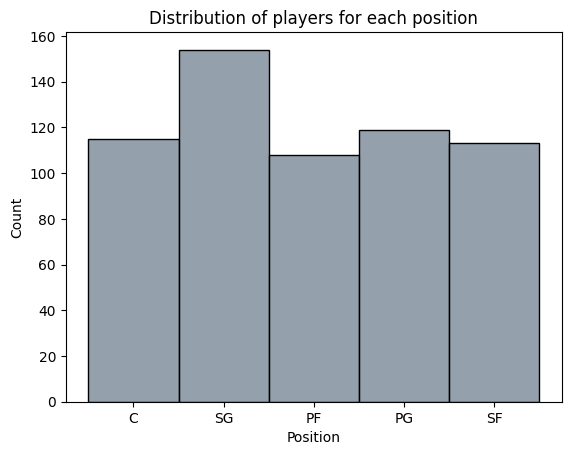

119 PG
154 SG
113 SF
108 PF
115 C


In [41]:
sns.histplot(data = df, x = df['Pos'], color = 'slategrey')
plt.title('Distribution of players for each position')
plt.xlabel('Position')
plt.show()
for position in position_data:
    print(position.shape[0], position['Pos'].values[0])

There seems to be a uniform distribution with the number of players in each position besides the shooting guard position. This probably contributes to the fact that NBA teams are searching for elite 3-point shooters all the time and most of the time shooting guards are the ones who specialize in 3-point shooting.

Let's take a look at how many players played less than 10 games in each of these positions. 

In [42]:
position_data = [point_guard, shooting_guard, small_forward, power_forward, center]
for position in position_data:
    print(position[position['G'] < 10].shape[0], position['Pos'].values[0])

18 PG
27 SG
19 SF
13 PF
14 C


As one can tell, the shooting guard position has the most players that have played less than 10 games, implying that this position has the most variance in players. 

Let's now take a deep dive and examine how points and assists are allocated amongst the positions in the NBA.

#### Mean `PTS` per game per position

In [43]:
mean_pg_ppg = point_guard['PTS'].mean()
mean_sg_ppg = shooting_guard['PTS'].mean()
mean_sf_ppg = small_forward['PTS'].mean()
mean_pf_ppg = power_forward['PTS'].mean()
mean_c_ppg = center['PTS'].mean()
mean_ppg = [mean_pg_ppg, mean_sg_ppg, mean_sf_ppg,mean_pf_ppg,mean_c_ppg]

#### Mean `AST` per game per position

In [44]:
mean_pg_ast = point_guard['AST'].mean()
mean_sg_ast = shooting_guard['AST'].mean()
mean_sf_ast = small_forward['AST'].mean()
mean_pf_ast = power_forward['AST'].mean()
mean_c_ast = center['AST'].mean()
mean_ast = [mean_pg_ast, mean_sg_ast, mean_sf_ast,mean_pf_ast,mean_c_ast]


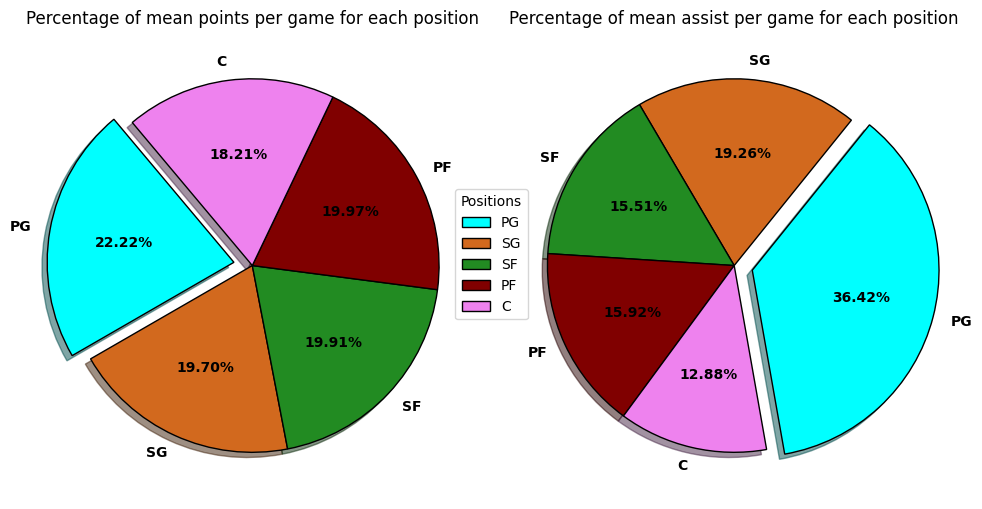

In [45]:
pos = ['PG','SG','SF','PF','C']
explode = [0.1,0.0,0.0,0.0,0.0]
colours = ('cyan','chocolate','forestgreen','maroon','violet')
fig = plt.figure(figsize=(10,14))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(mean_ppg, labels =pos, autopct='%.2f%%', explode=explode, shadow=True,startangle=130,
        wedgeprops={'edgecolor':'black'},colors=colours, textprops={'weight':'bold'})
ax2.pie(mean_ast, labels =pos, autopct='%1.2f%%', explode=explode, shadow=True,startangle=280, 
        wedgeprops={'edgecolor':'black'}, colors=colours, textprops={'weight':'bold'})
plt.tight_layout()
ax1.title.set_text('Percentage of mean points per game for each position')
ax2.title.set_text('Percentage of mean assist per game for each position')
fig.legend(pos, loc = 'center', title = 'Positions')
plt.show()

As we examine these pie charts, we can see that the point guard position has the highest percentage of mean points per game and the highest percentage of mean assist per game while compared to every other position. The game evolved to a point where point guards are not only handing out the most assist but now are scoring the most points on their respective teams. Let's look at the mean `FGA` and `FTA` for each position. 

In [46]:
mean_pg_fga = point_guard['FGA'].mean()
mean_sg_fga = shooting_guard['FGA'].mean()
mean_sf_fga = small_forward['FGA'].mean()
mean_pf_fga = power_forward['FGA'].mean()
mean_c_fga = center['FGA'].mean()
mean_fga = [mean_pg_fga, mean_sg_fga, mean_sf_fga, 
                      mean_pf_fga,mean_c_fga]

In [47]:
mean_pg_fta = point_guard['FTA'].mean()
mean_sg_fta = shooting_guard['FTA'].mean()
mean_sf_fta = small_forward['FTA'].mean()
mean_pf_fta = power_forward['FTA'].mean()
mean_c_fta = center['FTA'].mean()
mean_fta = [mean_pg_fta, mean_sg_fta, mean_sf_fta, 
                      mean_pf_fta,mean_c_fta]

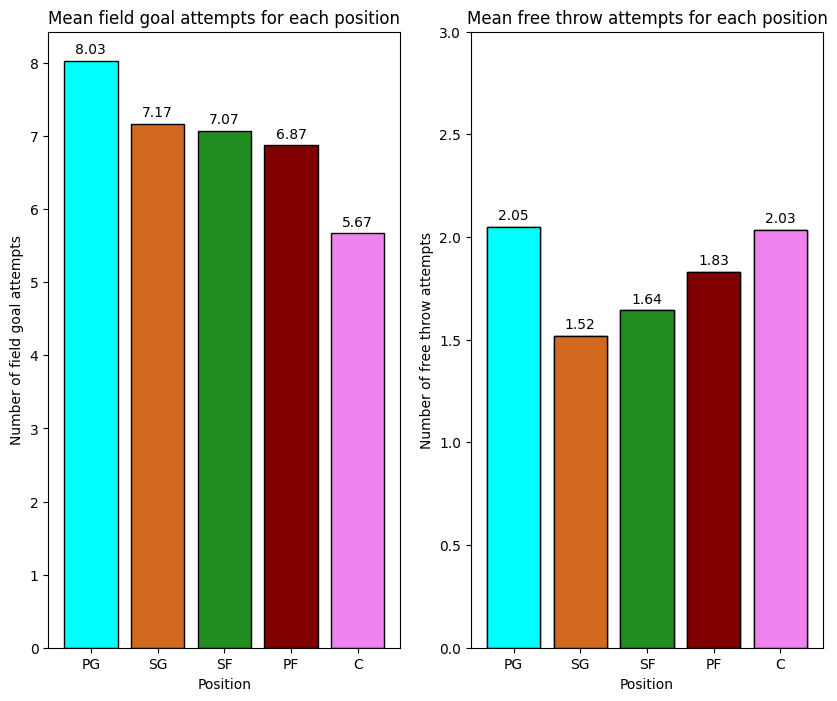

In [48]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(data = df, x = pos, height = mean_fga, color = colours, edgecolor = 'black')
barplot_fga = plt.bar(data = df, x = pos, height = mean_fga, color = colours, edgecolor = 'black', alpha=0.00)
ax1.bar_label(barplot_fga,labels = ['%.2f' % fg for fg in mean_fga], 
            label_type='edge', padding = 3)
ax1.set_ylabel('Number of field goal attempts')
ax1.set_xlabel('Position')
ax1.set_title('Mean field goal attempts for each position')

ax2.bar(data = df, x = pos, height = mean_fta, color = colours, edgecolor = 'black')
barplot_fta = plt.bar(data = df, x = pos, height = mean_fta, color = colours, edgecolor = 'black')
ax2.bar_label(barplot_fta, labels = ['%.2f' % ft for ft in mean_fta], 
            label_type='edge', padding = 3)
ax2.set_ylabel('Number of free throw attempts')
ax2.set_ylim(0,3)
ax2.set_xlabel('Position')
ax2.set_title('Mean free throw attempts for each position')
plt.show()

As you can see, the point guard position takes 1 more field goal than the next closest position which is the shooting guard position. Also, the point guard position leads the league in mean free throw attempts despite these players usually being the shortest players. This just implies that these small guards are really going down in the paint and trying to draw these fouls despite the major height disadvantage.

The `point guard` position is as crucial as any position in the NBA right now as they are dominating the ball in terms of scoring, shooting and passing the rock. There are several elite guards in the NBA these days and since the value of the 3point shot has increased tremendously, point guards are given so much freedom to shoot these shots whenever they want to. 

Speaking of 3-point shooting let's look at the mean `3PA` of each position. 

In [49]:
mean_pg_3pa = point_guard['3PA'].mean()
mean_sg_3pa = shooting_guard['3PA'].mean()
mean_sf_3pa = small_forward['3PA'].mean()
mean_pf_3pa = power_forward['3PA'].mean()
mean_c_3pa = center['3PA'].mean()
mean_3pa = [mean_pg_3pa, mean_sg_3pa, mean_sf_3pa, 
                      mean_pf_3pa,mean_c_3pa]

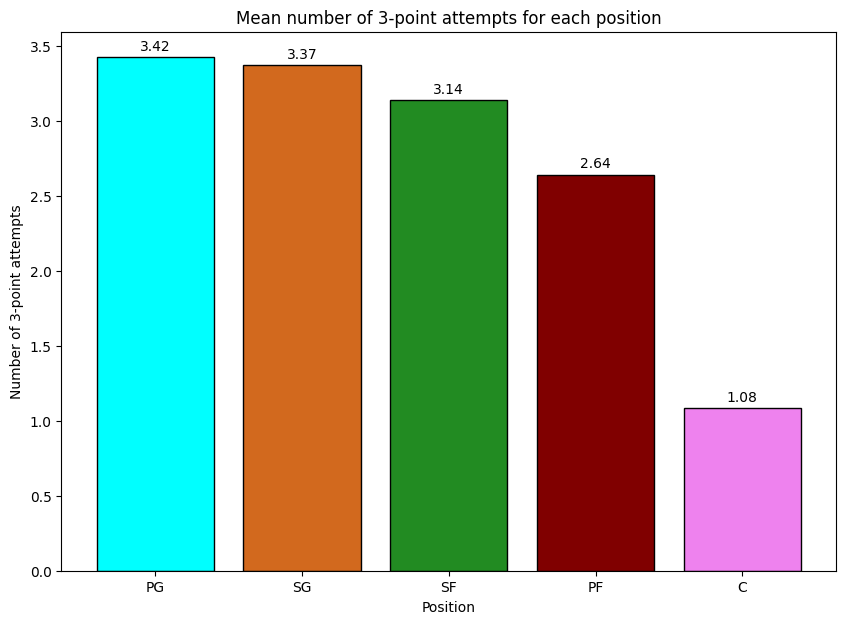

In [50]:
plt.figure(figsize=(10,7))
barplot_3pa = plt.bar(data = df, x = pos, height= mean_3pa, 
            color = colours, edgecolor = 'black')
plt.bar_label(barplot_3pa, labels = ['%.2f' % fg for fg in mean_3pa], 
            label_type='edge', padding = 3)
plt.ylabel('Number of 3-point attempts')
plt.xlabel('Position')
plt.title('Mean number of 3-point attempts for each position')
plt.show()

Even though it's not by much, the point guard position still leads the league in most `3PA`. Now let's bring this all together. The point guard position contributes to the most points and as well as attempts the most shots/free throws per game. Not only with all this scoring load, the point guard also dictates the flow of the game by handing out the most `AST` per game compared to every position. 

It appears that the NBA has become such a guard driven league where point guards are constantly looking for their own shots (typically 3 pointers) while also dismantling a team’s defence by dishing out some dimes (assists) to their teammates. 

However, there are still players in the NBA that aren't listed as point guards who really orchestrate their team’s offense while still scoring at a high level. 

Even though the NBA seems to be a guard heavy league right now, these players that we NBA fans like to call "Point forwards" truly dominant the game as much if not more than a point guard.


Brandon Ingram is a small forward who plays for the New Orleans Pelicans. He is a player who I believe doesn't get the recognition he deserves as he plays for a small market team while quietly putting up stellar stats.

Below is a table of Ingram's stats compared to his colleagues that play his position (Small forward). 

In [51]:
ingram = df.loc[df['Player'] == 'Brandon Ingram']

In [68]:
small_forward_no_ingram = small_forward[small_forward['Player'] != 'Brandon Ingram']
print("There are {} Small Forwards excluding Brandon Ingram".format(small_forward_no_ingram.shape[0]))

There are 112 Small Forwards excluding Brandon Ingram


In [53]:
avg_stats_sf = small_forward_no_ingram[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','MP']].mean()
ingram_avg_stats = ingram[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','MP']].mean()
data = {'Small Forwards': avg_stats_sf, 'Brandon Ingram': ingram_avg_stats}
df_avg_sf_vs_ingram = pd.DataFrame(data)
df_avg_sf_vs_ingram = df_avg_sf_vs_ingram.round(decimals=1)
print(df_avg_sf_vs_ingram)

     Small Forwards  Brandon Ingram
PTS             8.8            24.7
TRB             3.1             5.5
AST             1.5             5.8
STL             0.6             0.7
BLK             0.3             0.4
TOV             0.9             3.3
PF              1.6             2.6
MP             19.8            34.2


Clearly, Ingram is not no average small forward. He is an elite forward who is truly a bucket getter with elite court vision for his position. 

However, the typical NBA viewer is probably aware of this. How about we truly check how Ingram stacks up against small forwards who actually play meaningful minutes. Generally, if you are a small forward who has a big role on a team, you're expected to play over 25mins a game. Therefore, we will sort the data which only includes small forwards who played 25mins or more per game and played at least 20 games in the season. 

In [69]:
sf_25min = small_forward_no_ingram[small_forward_no_ingram['MP'] > 25]
sf_above_avg = sf_25min[sf_25min['G'] > 20]
print("There are {} Small Fowards who are classified as above average / play meaningful  minutes.".format(sf_above_avg.shape[0]))

There are 33 Small Fowards who are classified as above average / play meaningful  minutes.


Now we have 33 players compared to the 112 players from the previous list of small forwards. These small forwards who averaged over 25mins a game are small forwards who played more than half of the minutes in a game meaning, they must've had a meaningful role to their respective team. 

In [55]:
sf_above_avg_stats = sf_above_avg[['PTS','TRB','AST','STL','BLK','TOV','PF','MP']].mean()
df_avg_sf_vs_ingram = df_avg_sf_vs_ingram.assign(sf_above_avg = sf_above_avg_stats)
df_avg_sf_vs_ingram = df_avg_sf_vs_ingram.round(decimals=1)
print(df_avg_sf_vs_ingram)

     Small Forwards  Brandon Ingram  sf_above_avg
PTS             8.8            24.7          15.7
TRB             3.1             5.5           4.9
AST             1.5             5.8           2.5
STL             0.6             0.7           1.0
BLK             0.3             0.4           0.4
TOV             0.9             3.3           1.5
PF              1.6             2.6           2.3
MP             19.8            34.2          31.1


We can see that Ingram's stats still shine compared to high-level small forwards. One of Ingram's most underrated traits is his play making ability. Being 6'9 with his elite handles, he is able to orchestrate the New Orleans offence through his elite court vision. The scatter plot below really showcases Ingram's talent compared to his colleagues in his position. 

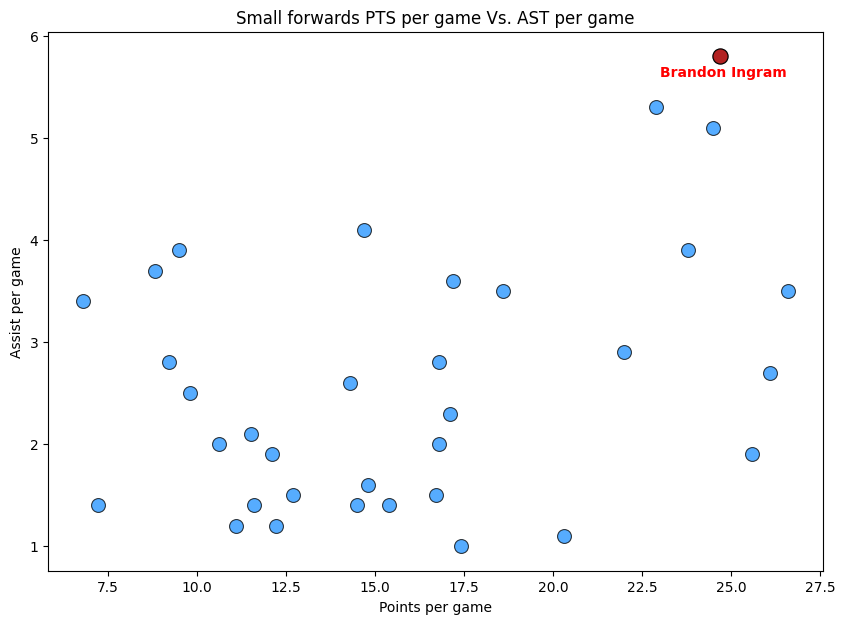

In [70]:
plt.figure(figsize=(10,7))
sns.scatterplot(data = sf_above_avg, x = 'PTS', y='AST', s = 100, alpha = 0.75, 
                color = 'dodgerblue', edgecolor='black')
sns.scatterplot(data = ingram, x= 'PTS',y='AST',s=120, color= 'firebrick', 
                edgecolor = 'black')
plt.text(23, 5.6, 'Brandon Ingram', color = 'red', size = 10, weight='bold')
plt.title('Small forwards PTS per game Vs. AST per game')
plt.xlabel('Points per game')
plt.ylabel('Assist per game')
plt.show()

Ingram stands out as an offensive threat as he has one of the highest points per game while leading the small forwards in assist per game. Even though he seems like a juggernaut on the offensive end, Ingram was not selected to the NBA all-star team due to injuries. This just goes to show the elite talent the NBA has. 

Earlier we were discussing how the NBA seemed to be like a guard driven league. Let's examine Ingrams `AST` numbers compared to a point guard who plays over 25mins a game.

In [57]:
pg_25min = point_guard[point_guard['MP'] > 25]
pg_above_avg = pg_25min[pg_25min['G'] > 20]

In [58]:
pg_ast = pg_above_avg[['AST']].mean()
ingram_ast = ingram[['AST']].mean()
data_ast = {'Ingram':ingram_ast, 'PG_Over_25min': pg_ast}
df_pg_vs_ingram_ast = pd.DataFrame(data_ast)
df_pg_vs_ingram_ast = df_pg_vs_ingram_ast.round(decimals=1)
print(df_pg_vs_ingram_ast)

     Ingram  PG_Over_25min
AST     5.8            6.1


Here we can see Ingram averages 0.3 less `AST` than PG's who played meaningful minutes. Considering how the average was 2.5 with small forwards who played meaningful minutes, the fact Ingram is remotely close to the average `AST` for point guard speaks volumes to his play making ability. As we saw earlier point guards are players who lead their team's offence so it makes sense for them having high `AST` numbers. However, Ingram is throwing DIMES as much as a point guard while being a small forward who is an elite 3-level scorer. 

Now as useful point guards can be, unfortunately the NBA is a very unforgiving league for those who are undersized. As we seen, point guards really do dominant the game from a game-to-game basis, however it's extremely rare for a point guard to lead their team to a championship.  

In the past 33 years of the NBA the only point guards who won the NBA finals MVP were Chauncey Billups (03-04) and Steph Curry (21-22). Now you may be wondering how a position like the point guard who dominates and controls the game as much as they do only receive 2 FMVP awards within the last 33 years. Well, this is largely due to the fact that in most recent years players from other positions realized they can do anything a point guard can do and if not maybe even better. Now days the NBA is filled with these sorts of players who we call point forwards and even point centers. 

A prime example of a point forward is Brandon Ingram who is a small forward in the NBA but basically acts like the point guard by conducting the New Orleans Pelicans offense by leading the team in `AST`. Now, Brandon Ingram was not even considered an all-star, that means there’s a bunch more of these point forwards / point centers who are much better than he his.

Let's take a look at the players who lead the league in `PTS` and as well as their `AST`, `REB`, and `Pos`.

In [59]:
df[['Player','Pos','PTS','TRB','AST']].sort_values('PTS', ascending=False).head(30)

,Player,Pos,PTS,TRB,AST
184,Joel Embiid,C,33.1,10.2,4.2
160,Luka Don?i?,PG,32.4,8.6,8.0
373,Damian Lillard,PG,32.2,4.8,7.3
209,Shai Gilgeous-Alexander,PG,31.4,4.8,5.5
12,Giannis Antetokounmpo,PF,31.1,11.8,5.7
590,Jayson Tatum,PF,30.1,8.8,4.6
175,Kevin Durant,PF,29.7,6.7,5.3
139,Stephen Curry,PG,29.4,6.1,6.3
306,LeBron James,PF,28.9,8.3,6.8
427,Donovan Mitchell,SG,28.3,4.3,4.4


This list consists of the top 30 points per game leaders in the NBA. Let's count how many players are in each position for this list.

In [60]:
df[['Player','Pos','PTS','TRB','AST']].sort_values('PTS', ascending=False).head(30).value_counts('Pos')

Pos
PG    10
PF     6
SF     6
C      4
SG     4
Name: count, dtype: int64

As we can see point guards are the ones that lead this list as expected from the analysis we did above. However, if we examine the top 10, 2022-2023 NBA MVP award voting candidates, it consists of the following players:
1) Joel Embiid
2) Nikola Jokic
3) Giannis Antetokounmpo 
4) Jayson Tatum
5) Shai-Gilgeous-Alexander 
6) Donovan Mitchell
7) Domantas Sabonis
8) Luka Doncic
9) Steph Curry
10) Jimmy Butler

Let's look at each of these players positions.

In [72]:
# Players like Jokic and Luka have '?' in their names due to the accents on their names
top_10_mvp_players = ['Joel Embiid', 'Nikola Joki?', 'Giannis Antetokounmpo','Jayson Tatum','Shai Gilgeous-Alexander','Donovan Mitchell','Domantas Sabonis','Luka Don?i?','Stephen Curry','Jimmy Butler']
my_list =[]
for player in top_10_mvp_players:
    print(player,df.loc[df['Player'] == player]['Pos'].values[0])

Joel Embiid C
Nikola Joki? C
Giannis Antetokounmpo PF
Jayson Tatum PF
Shai Gilgeous-Alexander PG
Donovan Mitchell SG
Domantas Sabonis C
Luka Don?i? PG
Stephen Curry PG
Jimmy Butler SF


There are only 3 players on this list that are point guard. However, if we look at both Shai and Luka, Shai is 6'6 while Luka is 6'7. These 2 players are nearly the size of forwards but are playing the point guard position. When we saw the top 30 point per game leaders for the 22-23 season, we noticed that the point guard position dominated that list. However, when we view the top 10 MVP candidates for the 22-23 season, realistically, there is only 1 point guard on this list who happens to be the GREATEST shooter of all time. This just goes to show that as dominant the point guard position may be, the league is truly run by these "oversized" point guards which we call point forwards / point centers. 

To start off this comparison, let's look at each player’s average `AST` numbers for the season compared to an above average point guard's `AST` numbers.

In [62]:
Average_pg_df = {'Player': 'Average_pg',
                 'Pos': 'PG',
                 'FG%':pg_above_avg['FG%'].mean(),
                 '3P%':pg_above_avg['3P%'].mean(),
                 'eFG%':pg_above_avg['eFG%'].mean(),
                 'AST':pg_above_avg['AST'].mean()}
Average_pg_df = pd.DataFrame([Average_pg_df])
pg_above_avg = pd.concat([pg_above_avg,Average_pg_df], ignore_index=True)

In [63]:
mask =  df['Player'].isin(top_10_mvp_players)
top10_mvp_data = df[mask]
entry = pg_above_avg.loc[pg_above_avg['Player'] == 'Average_pg']
mvp_avg_pg_df = pd.concat([top10_mvp_data,entry])

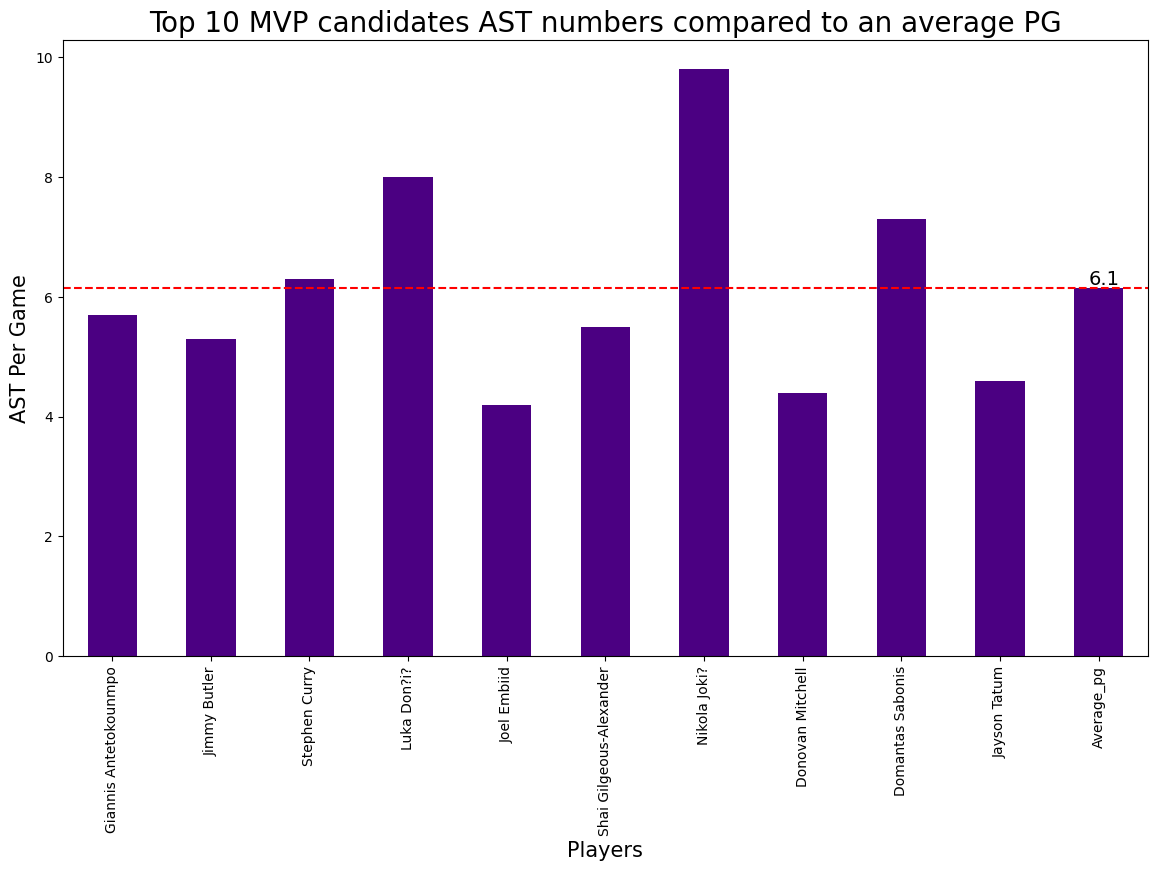

In [73]:
mvp_pg_ast = pd.DataFrame(mvp_avg_pg_df, columns=['Player','AST'])
mvp_pg_ast.plot(x='Player', y= ['AST'], kind='bar',figsize=(14,8), color = 'indigo')
plt.axhline(entry['AST'].values[0], color = 'red', linestyle = '--')
plt.text(9.9,6.2,'6.1', fontsize = 14)
plt.title('Top 10 MVP candidates AST numbers compared to an average PG', fontsize = 20)
plt.xlabel('Players', fontsize = 15)
plt.ylabel('AST Per Game', fontsize = 15)
plt.legend().set_visible(False)
plt.show()

Even though most of the players `AST` per game are below the average point guards `AST` per game, they are still relatively close. One thing that stands out on this graph is Nikola Jokic's `AST` per game. Jokic is a center who is averaging 9.8 `AST` per game which is ridiculous. It just goes to show that the point center position is as alive as ever in this current NBA.

Let's now examine these players efficiency compared to the point guards.

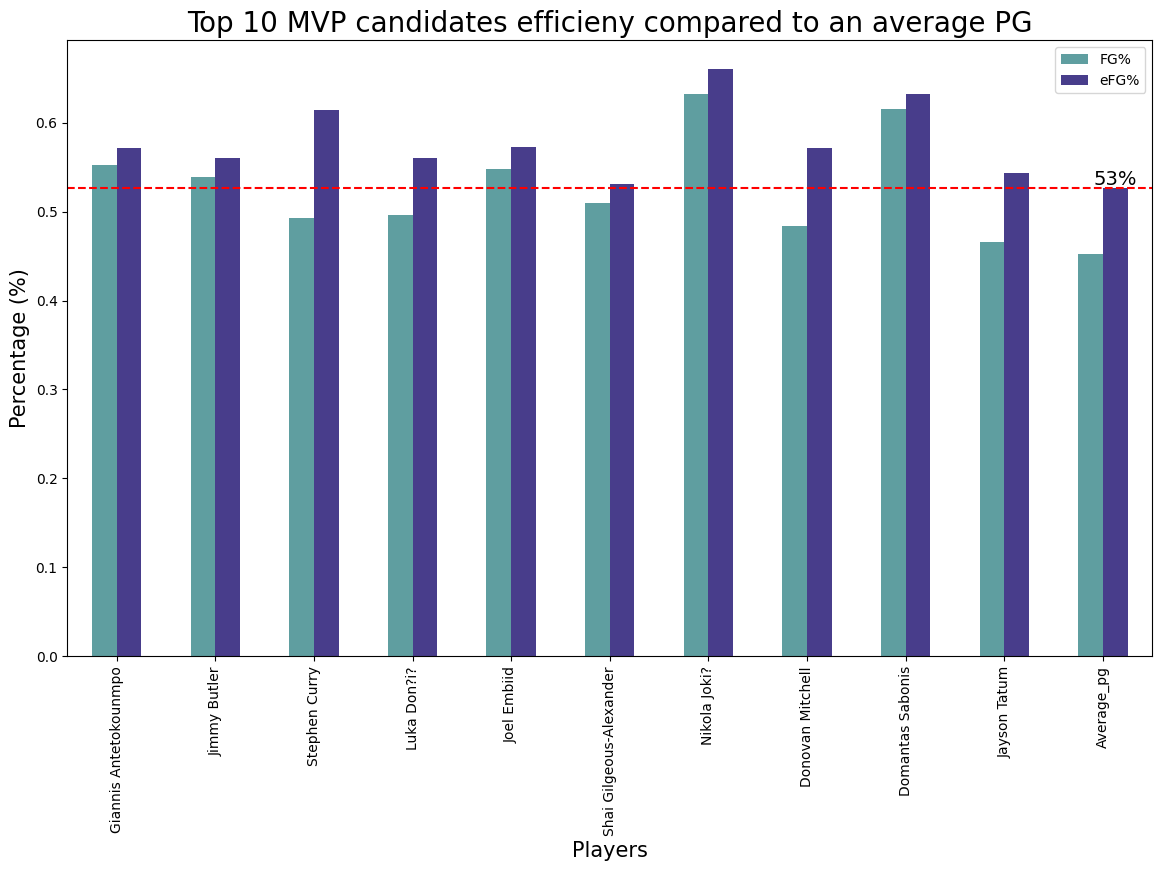

In [65]:
_df = pd.DataFrame(mvp_avg_pg_df, columns=['Player','FG%','eFG%'])
_df.plot(x='Player', y= ['FG%','eFG%'], kind='bar',figsize=(14,8), color = ('cadetblue','darkslateblue'))
plt.title('Top 10 MVP candidates efficieny compared to an average PG', fontsize = 20)
plt.xlabel('Players', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.text(9.9,0.53,'53%', fontsize = 14)
plt.axhline(entry['eFG%'].values[0], color = 'red', linestyle = '--')
plt.show()

From the graph above we are able to see that every player on the top 10 MVP candidate list was above the `eFG%` of an above average point guard in the league. `eFG%` is the metric that analyst use to determine how efficient a player is shooting by taking account the value of a 2point shot and a 3point shot. A player like Steph curry stands out because he is the only true point guard on this list and he has the second highest `eFG%`. This is largely due to the fact that Steph Curry is a sniper from distance who shoots a high volume and is extremely efficient as well (hence why his `eFG%` is so high).

Even though the point guards seem like they are dominating the game, these point forwards / point centers are the true rulers of the sport as they practically do everything a point guard is doing but being much more efficient (and much taller). Hence why they are all listed so highly on the MVP list. 

In fact, the last 5 MVPs were obtained by Giannis, Embiid and Nikola Jokic as they are revolutionizing the point center position. These 3 players are the focal point of their team’s offence as they are arranging their team's offence by racking up high `AST` and `PTS` numbers while being dominant big men by rebounding, blocking and defending the paint. 

## **Conclusion**

So, is the NBA truly a guard driven league? The answer is honestly yes but no! 

From the early parts of our analysis, it truly looked like the NBA was ruled by the point guard position who are relatively shorter players compared to a regular NBA player. These point guards are known for their elite shooting and ability to draw fouls while also being able to organize their team’s offense by having high `AST` numbers. However, as we kept exploring our data, we noticed players like Brandon Ingram who is a small forward, do the exact same thing a point guard is doing but he is 6'9 with a 7'3 wingspan! The crazy thing is that Brandon Ingram is not even considered one of the all stars of todays NBA so there are players even better than him doing what he’s doing but better. 

We looked at the top 10 MVP candidates for last year and realized there was only 1 true "Point guard" on that list and noticed that these point centers and forwards are truly the players that really run the NBA. 

With all the being said, the NBA is in a state where these small guards are actually being overshadowed by these long, tall point forward/centers who essentially do what a point guard is needed to do. What's hilarious is that even through all this analysis, we still never mentioned 1 player, LeBron James, who is arguably in peoples eyes the greatest of all time. The reason why you may ask? LeBron, even though being 39 years old revolutionized the point forward position by leading his team in `AST` for countless years while being a dominant force scoring the ball. Therefore, the game came to a point where the top players in the NBA have followed this blue print and teams realized that they can just give their best player the ball to run their offense through them. When LeBron first entered the league, it was extremely uncommon for a small-forward to run their team’s offence. However, in todays NBA it has become the norm for elite teams. 

The NBA is heading in a direction where your position really doesn't matter. The sport has evolved to a point where players from all positions are extremely talented at handling the ball and running a team’s offence. Let's just say 20 years from now we shouldn't be surprised once teams are filled with 7-footers who can shoot, dribble and pass the ball as good as any guard before them. 